In [8]:
import numpy as np
import random
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

In [9]:
data = np.array(pd.read_excel("../dataSet/Oliver30.xlsx",header=None))

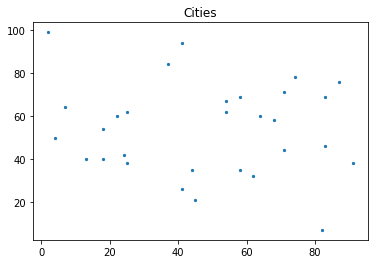

In [10]:
plt.title("Cities")
plt.scatter(data[:,0],data[:,1],s=5)
plt.show()

In [11]:
class SA_4_TSP():
    def __init__(self, data, max_epoch, alpha):
        self.cityNums  = data.shape[0]  # 城市数目
        self.max_epoch = max_epoch # 最大迭代次数
        self.alpha = alpha # 降温系数
        self.dist = squareform(pdist(data, metric='euclidean'))  # 计算N个城市的距离矩阵
        self.L = int(self.cityNums * (self.cityNums - 1) / 2)   # 平衡参数
        self.solution = random.sample(range(self.cityNums), self.cityNums) # 初始解-城市的全排列 list类型
        self.value = self.calcuValue(self.solution)  # 计算当前状态值
        self.T = self.initT() # 初始化温度
        self.T0 = self.T
        return
    
    def calcuValue(self, solution):  # 计算状态值
        value = 0
        for c in range(self.cityNums-1):
            value += self.dist[solution[c], solution[c+1]]
        value += self.dist[solution[0], solution[-1]]
        return value
    
    def pick_from_Nx(self, x):  # 从当前状态领域中挑选一个状态
        # input x - 当前解 - 一个城市的全排列
        # return 城市的全排列 list类型
        exchange_index = sorted(random.sample(range(self.cityNums), 2))
        solution = x.copy()
        solution[exchange_index[0]] = self.solution[exchange_index[1]]
        solution[exchange_index[1]] = self.solution[exchange_index[0]]
        return solution
    
    def initT(self):  # 初始化温度
        T = self.cityNums * self.L
        return T 
    
    def coolDown(self, k):  # 快速降温
        T = self.alpha * self.T 
        return T
    
    def evolute(self):  # 模拟退火过程
        t = 0 # 迭代次数
        while t < self.max_epoch:
            t += 1 # 当前迭代次数
            for i in range(self.L):
                newx = self.pick_from_Nx(self.solution)
                v = self.calcuValue(newx)
                delta = v - self.value   # 状态差值
                if delta < 0: # 更新状态
                    self.solution = newx  
                    self.value = v
                else:
                    r = random.random()
                    # 判断是否更新
                    if r <= np.exp(-delta / self.T):
                        self.solution = newx
                        self.value = v
            self.T = self.coolDown(t)  # 降温
        print('最优解:', self.solution)
        print('最优值:', self.value)
        return self.value, self.solution

In [12]:
max_epoch = 500
alpha = 0.93 # 降温系数

In [13]:
sa = SA_4_TSP(data, max_epoch, alpha)
value, solution = sa.evolute()

最优解: [16, 28, 26, 27, 15, 21, 22, 29, 5, 0, 1, 10, 6, 7, 25, 24, 23, 14, 13, 9, 20, 19, 18, 17, 2, 8, 3, 12, 4, 11]
最优值: 488.6962283736401


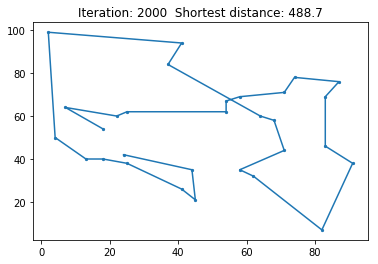

In [14]:
value = round(value,2)
plt.title("Iteration: "+str(max_epoch)+"  Shortest distance: "+ str(value))
plt.scatter(data[:,0],data[:,1],s=5)
plt.plot(data[solution,0],data[solution,1])
#fileName = "%s%s%s" %("最短路径",str(value),".png")
#plt.savefig(fileName)
plt.show()